READme
Post Processing for Pairwise Comparisons

Overview:
This scripts takes in two files produced from pairwise_new_prompting.ipynb, and calculates KS Statistic, TVD, and EMD between the two files (A list vs non A List)

Then it generates a density histogram comparing A List vs Non A List company average pairwise scores.


In [ ]:
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
from scipy import stats

function that calculates tvd

In [ ]:
# function that calculates the total variation distance between two histograms
def calculate_tvd(hist1, hist2):
    # Normalize histograms to sum to 1 (convert to probability distributions)
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)
    
    # Calculate the total variation distance
    tvd = 0.5 * np.sum(np.abs(hist1 - hist2))
    return tvd


Input the A list and Non A List files to read, define bins

In [ ]:
file_a = "pairwise_testing_new_prompt/without_explanation/Averages_147_A_List.csv"
file_b = "pairwise_testing_new_prompt/without_explanation/Averages_147_Non_A_List.csv"
df_average_companies = pd.read_csv(file_b)
df_average_a_list_companies = pd.read_csv(file_a)

# 25 bins from zero to 100
bins = [0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100]

bin_centers = [2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74, 78, 82, 86, 90, 94, 98]


This script gets the KS Statistic, P-Value, TVD, and EMD of the A list vs Non A List companies, then graphs a density histogram comparing their averages

KS Statistic: 0.4431689342403628
P-value: 2.194594564610937e-13
TVD =  0.4723639455782313
EMD =  30.99546485260771


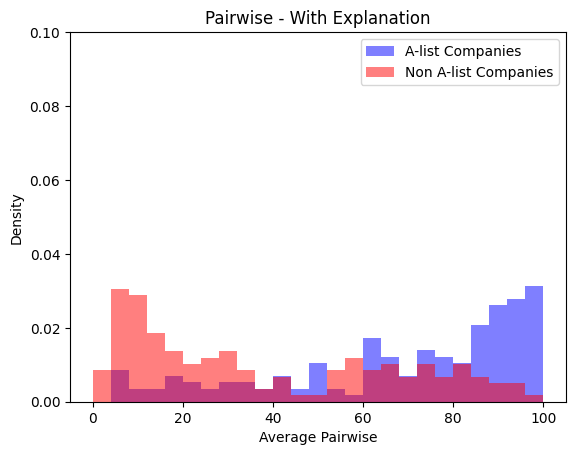

In [ ]:
hist1,_ = np.histogram(df_average_a_list_companies["Average"], bins = bins)
hist2,_ = np.histogram(df_average_companies["Average"], bins = bins)


ks_statistic, p_value = stats.ks_2samp(df_average_a_list_companies["Average"], df_average_companies["Average"])
print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

tvd = calculate_tvd(hist1, hist2)
print("TVD = ", tvd)

emd = wasserstein_distance(bin_centers, bin_centers, u_weights=hist1, v_weights=hist2)
print("EMD = ", emd)


# Set the y-axis limit
plt.ylim(0, 0.1)  # Adjust the max y-axis value to 10

plt.hist(df_average_a_list_companies["Average"], bins=bins, alpha = 0.5, label='A-list Companies', color='blue',density=True)
plt.hist(df_average_companies["Average"], bins=bins, alpha = 0.5, label='Non A-list Companies', color='red',density=True)
plt.xlabel('Average Pairwise')
plt.ylabel('Density')
hist_title = "Pairwise - With Explanation"
plt.title(hist_title)
plt.legend(loc='upper right')